<a href="https://colab.research.google.com/github/kamillik/ARIMA.demo/blob/main/ANN_Ka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Networks**

First, I need to import the necessary packages that I am planning to utilise in my analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels import datasets
import tensorflow as tf
import sklearn
import torch
import scipy

In [ ]:
print(pd.__version__, 'pandas version')
print(np.__version__, 'numpy version')
print(sns.__version__, 'seaborn version')
print(sm.__version__, 'statsmodels version')
print(sklearn.__version__, "scikit-learn version")
print(scipy.__version__, 'SciPy version')
print(torch.__version__, "PyTorch version")
print(matplotlib.__version__, "Matplotlib version")

1.5.3 pandas version
1.25.2 numpy version
0.13.1 seaborn version
0.14.1 statsmodels version
1.2.2 scikit-learn version
1.11.4 SciPy version
2.2.1+cu121 PyTorch version
3.7.1 Matplotlib version


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(100, oov_token="<html>")

In [ ]:
sentences = [
    "I made this.",
    "How hard is this.",
    "Could that be corrected?",
    "How?",
    "Corrected sentences first.",
    "These sentences need to be corrected."
]
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(sentences)


In [ ]:
print("Sequences of words: \n", sequence, "\n")

print("Word indices: \n", word_index)

Sequences of words: 
 [[7, 8, 3], [4, 9, 10, 3], [11, 12, 5, 2], [4], [2, 6, 13], [14, 6, 15, 16, 5, 2]] 

Word indices: 
 {'<html>': 1, 'corrected': 2, 'this': 3, 'how': 4, 'be': 5, 'sentences': 6, 'i': 7, 'made': 8, 'hard': 9, 'is': 10, 'could': 11, 'that': 12, 'first': 13, 'these': 14, 'need': 15, 'to': 16}


In [ ]:
padded = pad_sequences(sequence, padding="post", truncating="post")
padded

array([[ 7,  8,  3,  0,  0,  0],
       [ 4,  9, 10,  3,  0,  0],
       [11, 12,  5,  2,  0,  0],
       [ 4,  0,  0,  0,  0,  0],
       [ 2,  6, 13,  0,  0,  0],
       [14,  6, 15, 16,  5,  2]], dtype=int32)

In [ ]:
test_sentences = [
    "How can I?",
    "I can do this"
]


In [ ]:
test = tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(test)
print("Word index", word_index)
print("\nSequences: ", padded)

Word index {'<html>': 1, 'corrected': 2, 'this': 3, 'how': 4, 'be': 5, 'sentences': 6, 'i': 7, 'made': 8, 'hard': 9, 'is': 10, 'could': 11, 'that': 12, 'first': 13, 'these': 14, 'need': 15, 'to': 16}

Sequences:  [[0 4 1 7]
 [7 1 1 3]]


# Working with Big Data

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-03-15 17:41:55--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.207, 74.125.124.207, 142.250.152.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2024-03-15 17:41:56 (70.7 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

In [ ]:
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [ ]:
print(datastore[15])
print(datastore[129])

{'article_link': 'https://entertainment.theonion.com/nuclear-bomb-detonates-during-rehearsal-for-spider-man-1819572009', 'headline': "nuclear bomb detonates during rehearsal for 'spider-man' musical", 'is_sarcastic': 1}
{'article_link': 'https://www.huffingtonpost.com/entry/sweden-fox-news-trump-police_us_58ab095ee4b037d17d29be2b', 'headline': 'swedish police featured in film shown by fox news say they were selectively edited', 'is_sarcastic': 0}


In [ ]:
sarcasm = []
url = []
headline = []
for item in datastore:
     sarcasm.append(item['is_sarcastic'])
     url.append(item['article_link'])
     headline.append(item['headline'])

In [ ]:
tokenizer = Tokenizer(10000, oov_token="KK")
tokenizer.fit_on_texts(headline)
word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(headline)
print(word_index, "\n WORD Index \n")
padded = pad_sequences(sequence)
print(padded, "\n Padded")

{'KK': 1, 'to': 2, 'of': 3, 'the': 4, 'in': 5, 'for': 6, 'a': 7, 'on': 8, 'and': 9, 'with': 10, 'is': 11, 'new': 12, 'trump': 13, 'man': 14, 'from': 15, 'at': 16, 'about': 17, 'you': 18, 'this': 19, 'by': 20, 'after': 21, 'up': 22, 'out': 23, 'be': 24, 'how': 25, 'as': 26, 'it': 27, 'that': 28, 'not': 29, 'are': 30, 'your': 31, 'his': 32, 'what': 33, 'he': 34, 'all': 35, 'just': 36, 'who': 37, 'has': 38, 'will': 39, 'more': 40, 'one': 41, 'into': 42, 'report': 43, 'year': 44, 'why': 45, 'have': 46, 'area': 47, 'over': 48, 'donald': 49, 'u': 50, 'day': 51, 'says': 52, 's': 53, 'can': 54, 'first': 55, 'woman': 56, 'time': 57, 'like': 58, 'her': 59, "trump's": 60, 'old': 61, 'no': 62, 'get': 63, 'off': 64, 'an': 65, 'life': 66, 'people': 67, 'obama': 68, 'now': 69, 'house': 70, 'still': 71, "'": 72, 'women': 73, 'make': 74, 'was': 75, 'than': 76, 'white': 77, 'back': 78, 'my': 79, 'i': 80, 'clinton': 81, 'down': 82, 'if': 83, '5': 84, 'when': 85, 'world': 86, 'could': 87, 'we': 88, 'their

In [ ]:
padded.shape

(26709, 40)

In [ ]:
#Now we have a model with 26709 distinct words, we can check how good it can predict
test_sentences = {
    "I hope everything will be good.",
    "How hard could that be?",
    "Obama"}
test_sequence = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequence, maxlen=10)
test_padded

array([[  0,   0,   0,   0,  80, 682, 442,  39,  24, 134],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  68],
       [  0,   0,   0,   0,   0,  25, 545,  87,  28,  24]], dtype=int32)

In [ ]:
def get_key(dictionary, value):
      for k, val in dictionary.items():
           if value == val:
               return k

In [ ]:
print(get_key(word_index, 25))
print(get_key(word_index, 545))
print(get_key(word_index, 87))
print(get_key(word_index, 28))
print(get_key(word_index, 68))

how
hard
could
that
obama


'KK'


# Practice

Here I am going to check what I've learned so far in terms of NLP.



In [ ]:
sentences = [
    "How to do it?",
    "It isn't going to be easy.",
    "Let's do it."]
tokenizer = Tokenizer(num_words=10, oov_token= "KK")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(sentences)
print("Indices: \n",word_index)
print("\n Sequences: \n", sequence)

Indices: 
 {'KK': 1, 'it': 2, 'to': 3, 'do': 4, 'how': 5, "isn't": 6, 'going': 7, 'be': 8, 'easy': 9, "let's": 10}

 Sequences: 
 [[5, 3, 4, 2], [2, 6, 7, 3, 8, 9], [1, 4, 2]]


In [ ]:
padded = pad_sequences(sequence, maxlen=10)
padded

array([[0, 0, 0, 0, 0, 0, 5, 3, 4, 2],
       [0, 0, 0, 0, 2, 6, 7, 3, 8, 9],
       [0, 0, 0, 0, 0, 0, 0, 1, 4, 2]], dtype=int32)

In [ ]:
test_sentences = {
    "Hello, boy.",
    "How to do it?"
}
tokenizer.fit_on_texts(test_sentences)
test_sequence = tokenizer.texts_to_sequences(test_sentences)

In [ ]:
padded = pad_sequences(test_sequence)
padded

array([[0, 0, 1, 1],
       [5, 3, 4, 2]], dtype=int32)

Here I applied all the things that I had got from the course and predicted two new sentences on my model.

# ***Working on my own data***

In [ ]:
import openpyxl

In [ ]:
xlsx = pd.read_excel("/content/sample_data/du.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/du.xlsx'

In [ ]:
xlsx.head()

,un_rate,GDP_per_capita_change,Ex_rate,GP_change
0,0.0910,0.237164,0.797075,0.202930
1,0.1000,0.110672,0.773800,0.212850
2,0.1090,0.021352,0.824033,0.309315
3,0.1178,0.141115,0.894831,0.130201
4,0.1091,0.074809,0.931317,0.212759


In [ ]:
type(xlsx)

pandas.core.frame.DataFrame

In [ ]:
xlsx.index = pd.date_range("31-12-1996", "31-12-2021", freq="A")

<ipython-input-9-ac452758bda5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  xlsx.index = pd.date_range("31-12-1996", "31-12-2021", freq="A")


In [ ]:
xlsx.head()

,un_rate,GDP_per_capita_change,Ex_rate,GP_change
1996-12-31,0.0910,0.237164,0.797075,0.202930
1997-12-31,0.1000,0.110672,0.773800,0.212850
1998-12-31,0.1090,0.021352,0.824033,0.309315
1999-12-31,0.1178,0.141115,0.894831,0.130201
2000-12-31,0.1091,0.074809,0.931317,0.212759


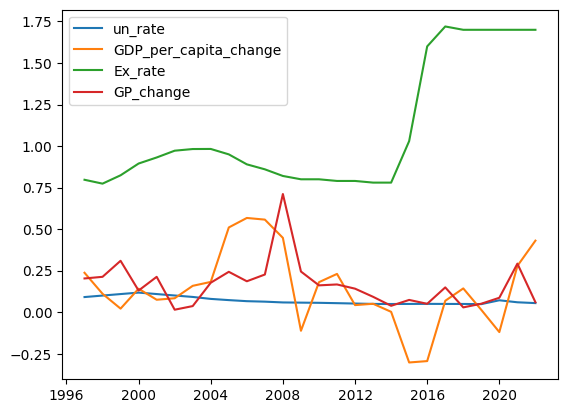

In [ ]:
plt.plot(xlsx)
plt.legend(xlsx.columns)


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
jo_result = coint_johansen(xlsx, 0, 3)

In [ ]:
print(jo_result.trace_stat)
print("Trace statistics")
print(jo_result.trace_stat_crit_vals)
print("Trace statistics critical values")
print(jo_result.max_eig_stat)
print()
print(jo_result.max_eig_stat_crit_vals)

[95.12337513 46.06064844 23.88103488  9.48713884]
Trace statistics
[[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Trace statistics critical values
[49.06272669 22.17961356 14.39389604  9.48713884]

[[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


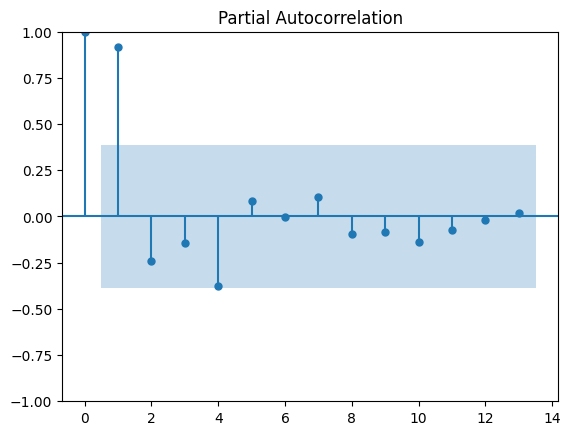

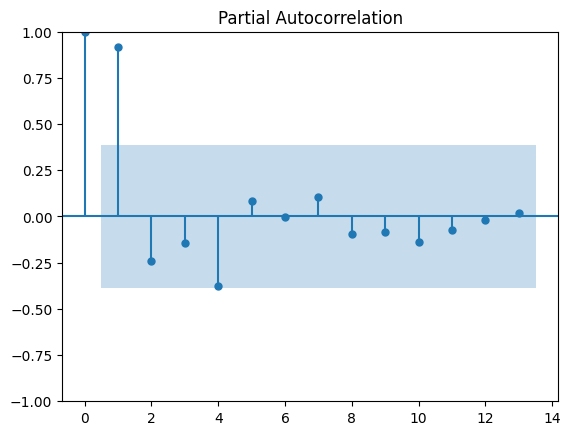

In [ ]:
sm.tsa.graphics.plot_pacf(xlsx['un_rate'])

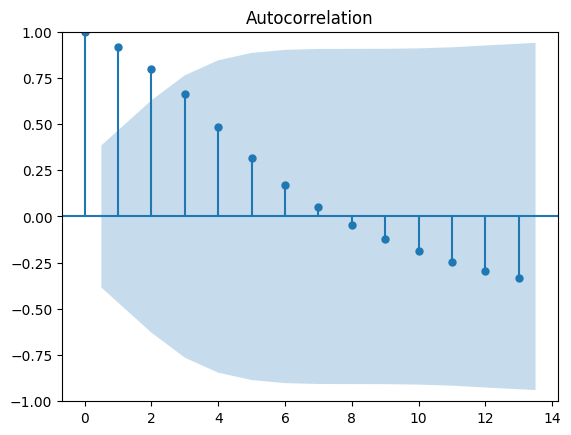

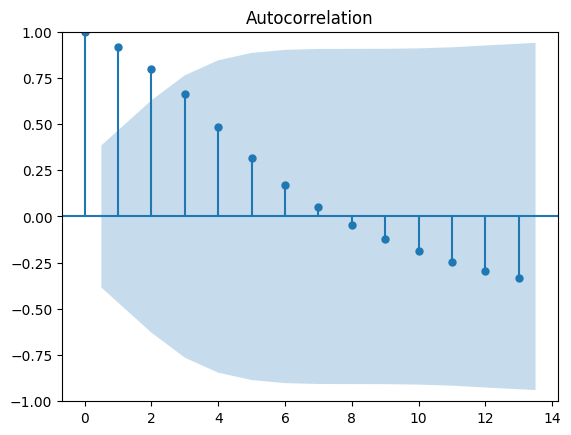

In [ ]:
sm.tsa.graphics.plot_acf(xlsx['un_rate'])

In [ ]:
sm.tsa.adfuller(xlsx['un_rate'], 4)

(-0.9630216902271458,
 0.766511315513307,
 0,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 -155.48797861999407)

In [ ]:
sm.tsa.kpss(xlsx["un_rate"], 'c', 12
            )

<ipython-input-30-1184bbf05b92>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  sm.tsa.kpss(xlsx["un_rate"], 'c', 12


(0.3278369543963433,
 0.1,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
un_cycle, un_trend = sm.tsa.cf_filter.cffilter(xlsx['un_rate'])

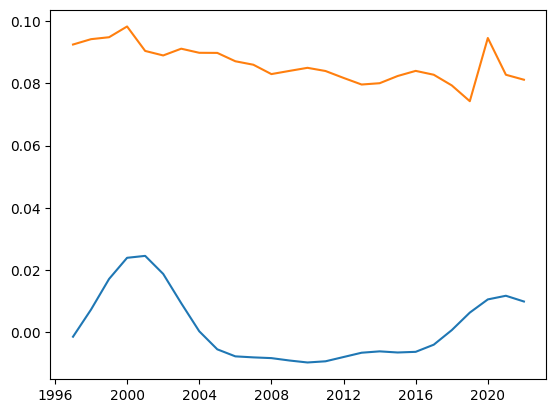

In [ ]:
plt.plot(un_cycle)
plt.plot(un_trend)